In [2]:
using Pkg
Pkg.instantiate()
Pkg.add("MCMCChains")
using TAMode
using Plots
using StaticArrays
using LinearAlgebra

  Resolving package versions...
   Updating `~/TAMode.jl/Project.toml`
 [no changes]
   Updating `~/TAMode.jl/Manifest.toml`
 [no changes]


In [3]:
tpsA549 = @SVector Float64[60, 240];
gasA549 = @SVector Float64[64, 16, 4, 1, 0.25, 0];
pYA549 = @SMatrix [10.8 8.3; 7.4 7.1; 7.1 7.7; 4.6 8.2; 6.1 7.2; 7.5 7.5];
totA549 = @SMatrix [3443.1 3219.7; 3143.4 3353.8; 3018.9 3611.8; 2608.9 3448.2; 2690.2 3168.1; 2672.0 2672.0];
surfA549 = @SMatrix [0.206 0.239; 0.274 0.316; 0.281 0.251; 0.220 0.302; 0.256 0.281; 0.257 0.337];

In [4]:
using MCMCChains
chn = read("chain-file-new5_19.jls", Chains);
summarize(chn)

Summary Statistics
     parameters     mean     std  naive_se    mcse       ess   r_hat
  ─────────────  ───────  ──────  ────────  ──────  ────────  ──────
        AXLexpr   1.6615  1.9516    0.1234  0.0417  170.2541  1.0017
         Ig2rev   1.4745  1.6345    0.1034  0.0281  325.3395  0.9964
         gasCur   0.1004  0.0101    0.0006  0.0001  453.9682  0.9982
    internalize   0.1003  0.0101    0.0006  0.0001  645.8023  0.9961
           kDeg   0.0100  0.0011    0.0001  0.0001  380.5343  0.9962
           kRec   0.1003  0.0097    0.0006  0.0007  462.4738  0.9988
  pYinternalize   1.0046  0.0956    0.0060  0.0071  398.9532  0.9992
          scale   1.3967  1.4748    0.0933  0.0795  338.6355  0.9976
      scaleSurf   1.5990  2.6043    0.1647  0.0397  302.9257  0.9967
          sortF   0.0937  0.0781    0.0049  0.0017  517.8043  0.9962
        sqResid  36.8803  7.7362    0.4893  0.0682  415.7422  0.9970
           xFwd   0.0842  0.1037    0.0066  0.0022  289.4505  0.9980


In [5]:
x = get(chn, [:internalize, :pYinternalize, :sortF, :kRec, :kDeg, :xFwd, :gasCur, :AXLexpr])
samp_params = hcat(x.internalize, x.pYinternalize, x.sortF, x.kRec, x.kDeg, x.xFwd, x.gasCur, x.AXLexpr)

Ig2rev = get(chn, :Ig2rev)[1];
scale = get(chn, :scale)[1];
scaleSurf = get(chn, :scaleSurf)[1];

In [6]:
pY = Array{Float64}(undef, 250, length(tpsA549), length(gasA549));
tot = Array{Float64}(undef, 250, length(tpsA549), length(gasA549));
surf = Array{Float64}(undef, 250, length(tpsA549), length(gasA549));

for iter = 1:size(samp_params, 1)
    params = vcat(samp_params[iter, :], zeros(2), Ig2rev[iter], ones(4))
    pY[iter, :, :], tot[iter, :, :], surf[iter, :, :] = TAMode.dataModelCalc(tpsA549, gasA549, params, scale[iter], scaleSurf[iter])
end
    

In [7]:
using Statistics
medpY = Statistics.median(pY, dims = 1);
medtot = Statistics.median(tot, dims = 1);
medsurf = Statistics.median(surf, dims = 1);
stdsurf = Statistics.std(surf, dims = 1);
meanpY = Statistics.mean(pY, dims = 1);
meantot = Statistics.mean(tot, dims = 1);
meansurf = Statistics.mean(surf, dims = 1);

In [8]:
tp1_calcmean = hcat(transpose(meanpY[:,1,:]), transpose(meansurf[:,1,:]), transpose(meantot[:,1,:]));
tp2_calcmean = hcat(transpose(meanpY[:,2,:]), transpose(meansurf[:,2,:]), transpose(meantot[:,2,:]));
tp1_calcmed = hcat(transpose(medpY[:,1,:]), transpose(medsurf[:,1,:]), transpose(medtot[:,1,:]));
tp2_calcmed = hcat(transpose(medpY[:,2,:]), transpose(medsurf[:,2,:]), transpose(medtot[:,2,:]));
tp1_exp = hcat(pYA549[:,1], surfA549[:,1], totA549[:,1]);
tp2_exp = hcat(pYA549[:,2], surfA549[:,2], totA549[:,2]);

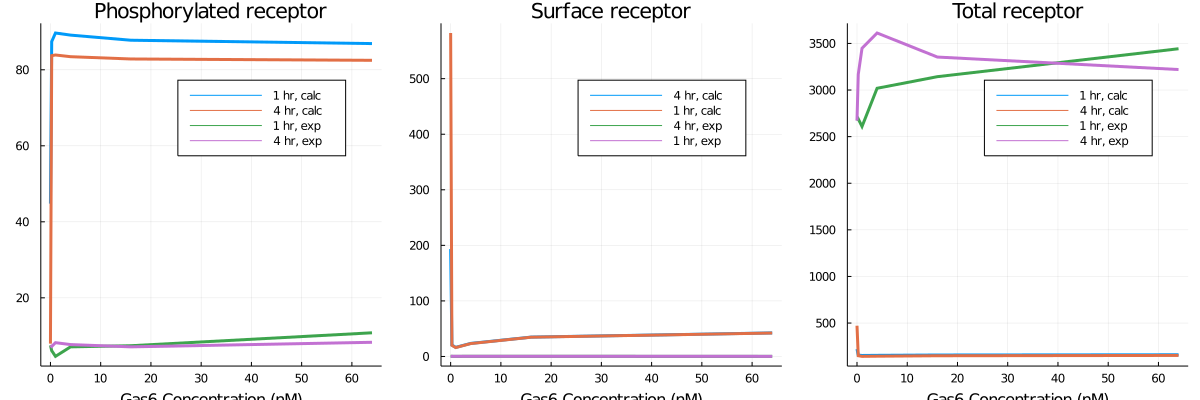

In [9]:
### mean
plot(gasA549, [tp1_calcmean, tp2_calcmean], 
        label=["1 hr, calc" "4 hr, calc"] , 
        title=["Phosphorylated receptor" "Surface receptor" "Total receptor"], 
        lw=3, 
        layout = (1,3), 
        size=(1200,400))
plot!(gasA549, [tp1_exp, tp2_exp], 
        label=["1 hr, exp" "4 hr, exp"], 
        lw=3,
        layout=(1,3))
        xlabel!("Gas6 Concentration (nM)")

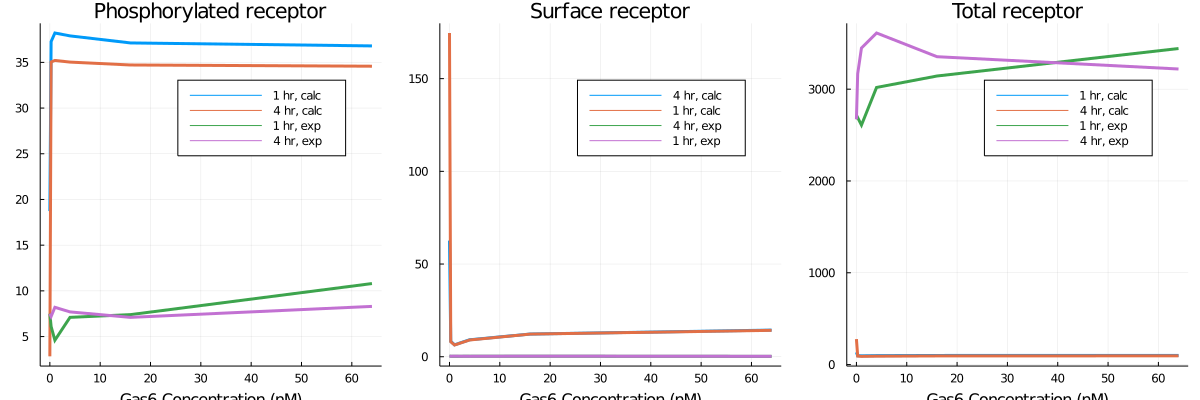

In [10]:
### meadian
plot(gasA549, [tp1_calcmed, tp2_calcmed], 
        label=["1 hr, calc" "4 hr, calc"] , 
        title=["Phosphorylated receptor" "Surface receptor" "Total receptor"], 
        lw=3, 
        layout = (1,3), 
        size=(1200,400))
plot!(gasA549, [tp1_exp, tp2_exp], 
        label=["1 hr, exp" "4 hr, exp"], 
        lw=3,
        layout=(1,3))
        xlabel!("Gas6 Concentration (nM)")